In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [3]:
file_path = "RA2019_A2.csv"  
df = pd.read_csv(file_path)

In [4]:
X = df[[
    "State/UT-Wise Total Number of Road Accidents during 2016",
    "State/UT-Wise Total Number of Road Accidents during 2017",
    "State/UT-Wise Total Number of Road Accidents during 2018"
]]
y = df["State/UT-Wise Total Number of Road Accidents during 2019 - Numbers"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept:.2f}")
print(f"Coefficients: {coefficients}")

Intercept: -57.80
Coefficients: [-0.43350028  0.12194778  1.28597012]


In [10]:
y_pred = model.predict(X_test)
print("Predictions vs Actual Values:")
print(f"Predicted values:\n{y_pred}")

Predictions vs Actual Values:
Predicted values:
[-1.73308970e+01  4.91522201e+04  1.35379346e+04  1.88712237e+02
  1.43679116e+03  4.71936350e+02  1.69295772e+04  1.33578826e+03]


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Absolute Error (MAE): 294.87
Mean Squared Error (MSE): 311040.41


In [13]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9988


In [14]:
df_cleaned = df.dropna(subset=['Total Number of Accidents Per Lakh Population - 2019', 'State/UT-Wise Total Number of Road Accidents during 2019 - Numbers'])

In [15]:
X = df_cleaned[['Total Number of Accidents Per Lakh Population - 2019']]
y = df_cleaned['State/UT-Wise Total Number of Road Accidents during 2019 - Numbers']

In [16]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

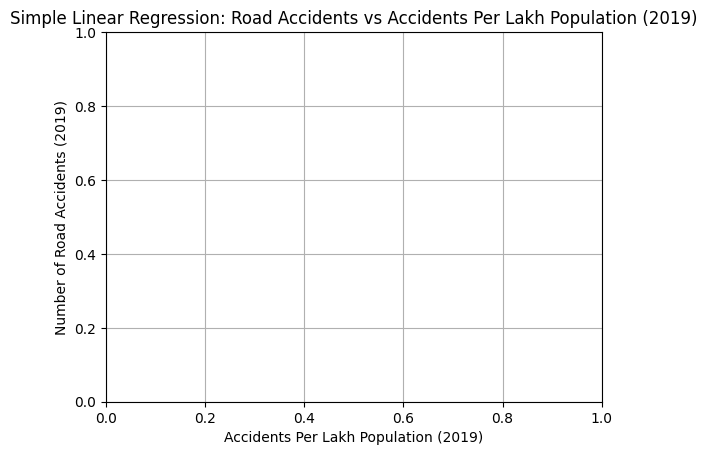

In [29]:
plt.title('Simple Linear Regression: Road Accidents vs Accidents Per Lakh Population (2019)')
plt.xlabel('Accidents Per Lakh Population (2019)')
plt.ylabel('Number of Road Accidents (2019)')
plt.grid(True)
plt.show()

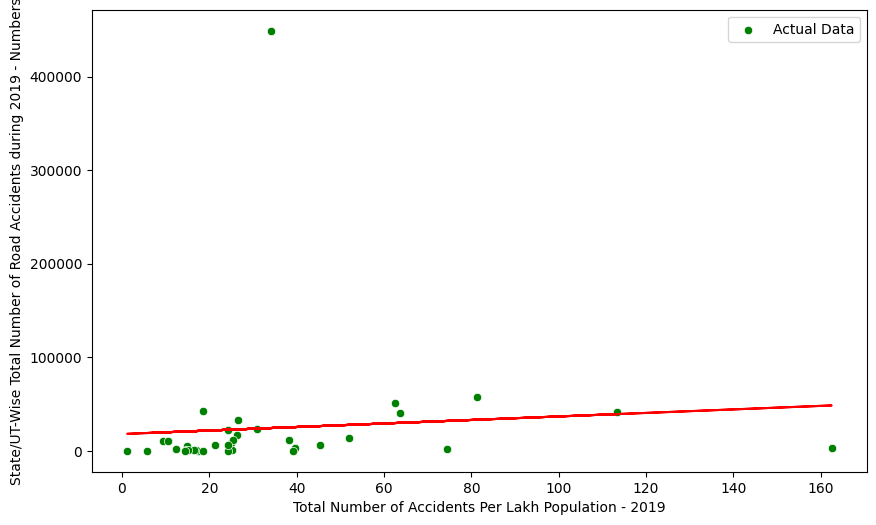

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Total Number of Accidents Per Lakh Population - 2019'], y=y, color='green', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

In [23]:
feature_cols = [
    'Total Number of Accidents Per Lakh Population - 2019',
    'Total Number of  Road Accidents per 10,000 Vehicles - 2019'
]

In [31]:
df_cleaned = df.dropna(subset=feature_cols + ['State/UT-Wise Total Number of Road Accidents during 2019 - Numbers'])
X = df_cleaned[feature_cols]
y = df_cleaned['State/UT-Wise Total Number of Road Accidents during 2019 - Numbers']

In [32]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [33]:
y_pred = model.predict(X)

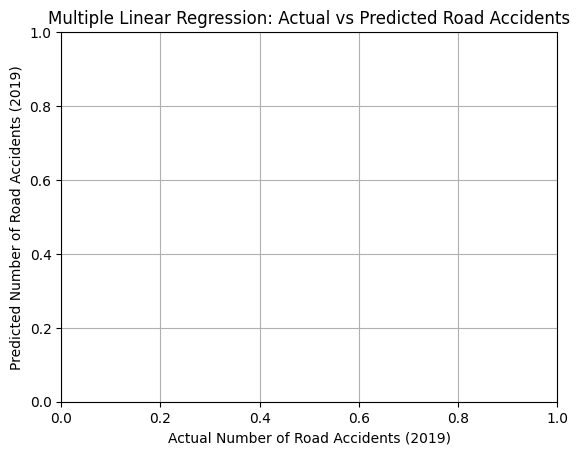

In [36]:
plt.title('Multiple Linear Regression: Actual vs Predicted Road Accidents')
plt.xlabel('Actual Number of Road Accidents (2019)')
plt.ylabel('Predicted Number of Road Accidents (2019)')
plt.grid(True)
plt.show()

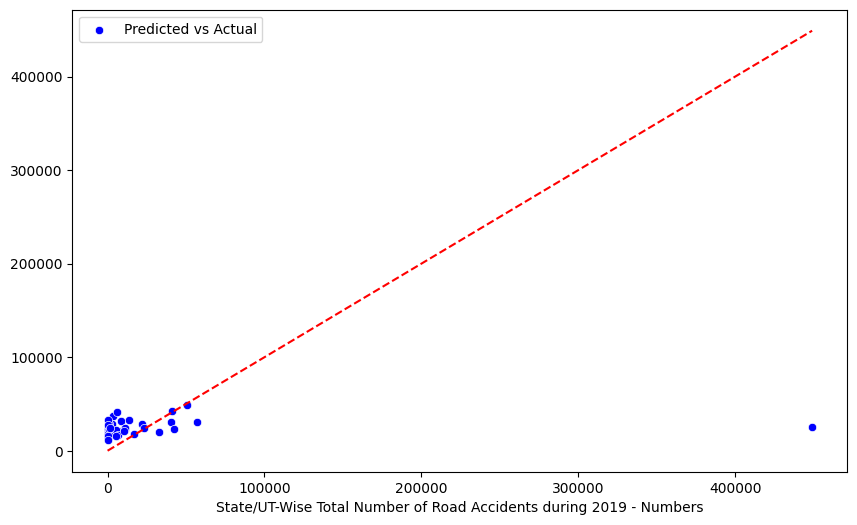

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')

In [40]:
degree = 2 
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X[['Total Number of Accidents Per Lakh Population - 2019']], y)
y_poly_pred = poly_model.predict(X[['Total Number of Accidents Per Lakh Population - 2019']])

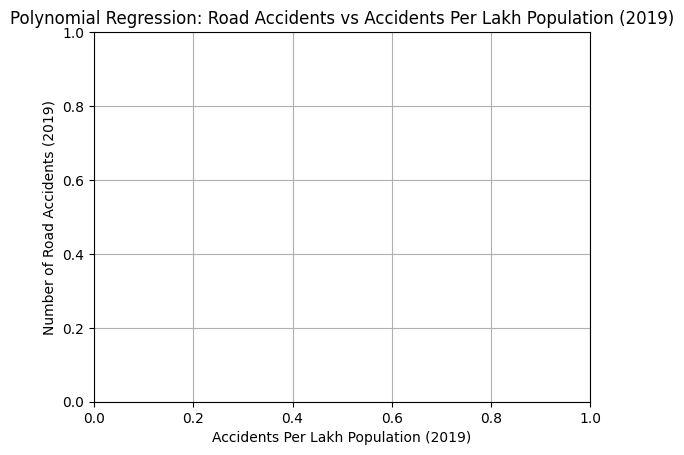

In [43]:
plt.title('Polynomial Regression: Road Accidents vs Accidents Per Lakh Population (2019)')
plt.xlabel('Accidents Per Lakh Population (2019)')
plt.ylabel('Number of Road Accidents (2019)')
plt.grid(True)
plt.show()

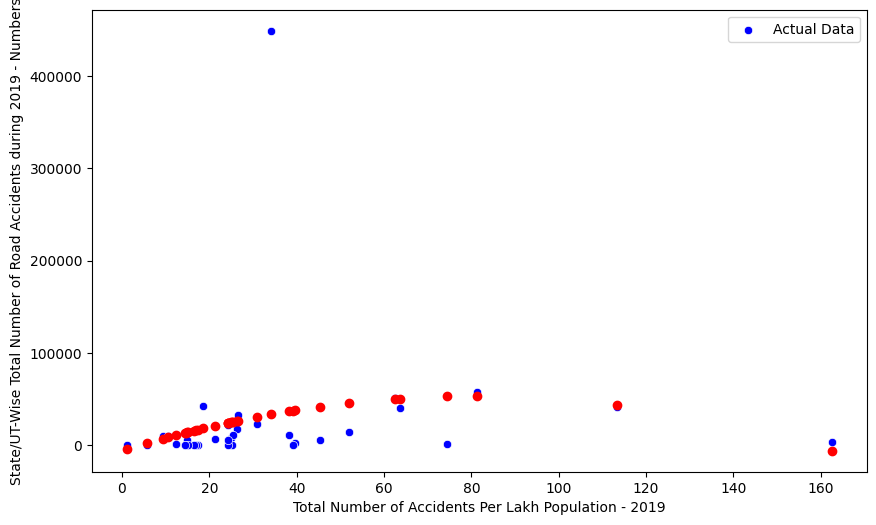

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Total Number of Accidents Per Lakh Population - 2019'], y=y, color='blue', label='Actual Data')
plt.scatter(X['Total Number of Accidents Per Lakh Population - 2019'], y_poly_pred, color='red', label='Polynomial Regression')

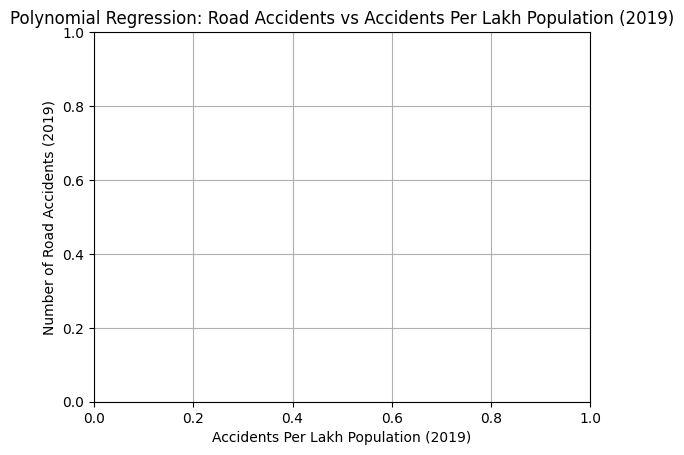

In [47]:
plt.title('Polynomial Regression: Road Accidents vs Accidents Per Lakh Population (2019)')
plt.xlabel('Accidents Per Lakh Population (2019)')
plt.ylabel('Number of Road Accidents (2019)')
plt.grid(True)
plt.show()

In [48]:
X_sm = sm.add_constant(X)  # Add a constant term for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                                                    OLS Regression Results                                                    
Dep. Variable:     State/UT-Wise Total Number of Road Accidents during 2019 - Numbers   R-squared:                       0.013
Model:                                                                            OLS   Adj. R-squared:                 -0.049
Method:                                                                 Least Squares   F-statistic:                    0.2117
Date:                                                                Wed, 19 Feb 2025   Prob (F-statistic):              0.810
Time:                                                                        08:59:55   Log-Likelihood:                -442.05
No. Observations:                                                                  35   AIC:                             890.1
Df Residuals:                                                                      32   BIC:                   